In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_excel(r"Data_Train.xlsx")

In [2]:
#Questions
#1. How to concatenate more than one dummy variable using single line of code
#2.ask what is returned by duplicated().sum() function
#Ask total stops mai null values kyu aa rhi hai

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
int_cols = df.select_dtypes(include=np.int64)
int_cols = int_cols.columns
df[int_cols] = df[int_cols].astype(np.int32)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int32 
dtypes: int32(1), object(10)
memory usage: 876.5+ KB


In [8]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#ask what does this return
df.duplicated().sum()

220

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [12]:
df = pd.get_dummies(columns = ['Airline','Source','Destination','Additional_Info'],drop_first=True,data = df)

In [13]:
# Ordinal encoding
#map_total_stops = {'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'non-stop':5,}
#df['Total_Stops'] = df['Total_Stops'].map(map_total_stops)

In [15]:
# Dropping the unnecessary features
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Route','Total_Stops'],axis=1,inplace=True)

In [16]:
duration_in_mins = []
for i in df['Duration']:
    if len(i.split()) == 2:
        time = i.split()
        duration_in_mins.append(int(time[0][:-1])*60 + int(time[1][:-1]))
    else:
        if i[-1] == 'h':
            duration_in_mins.append(int(i[:-1])*60)
        elif i[-1] == 'm':
            duration_in_mins.append(int(i[:-1]))

# Let's create new features
df['duration_in_mins'] = duration_in_mins
df.drop(['Duration'],axis=1,inplace=True)

In [17]:
df.head(5)

,Price,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,duration_in_mins
0,3897,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,170
1,7662,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,445
2,13882,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1140
3,6218,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,325
4,13302,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,285


<AxesSubplot: >

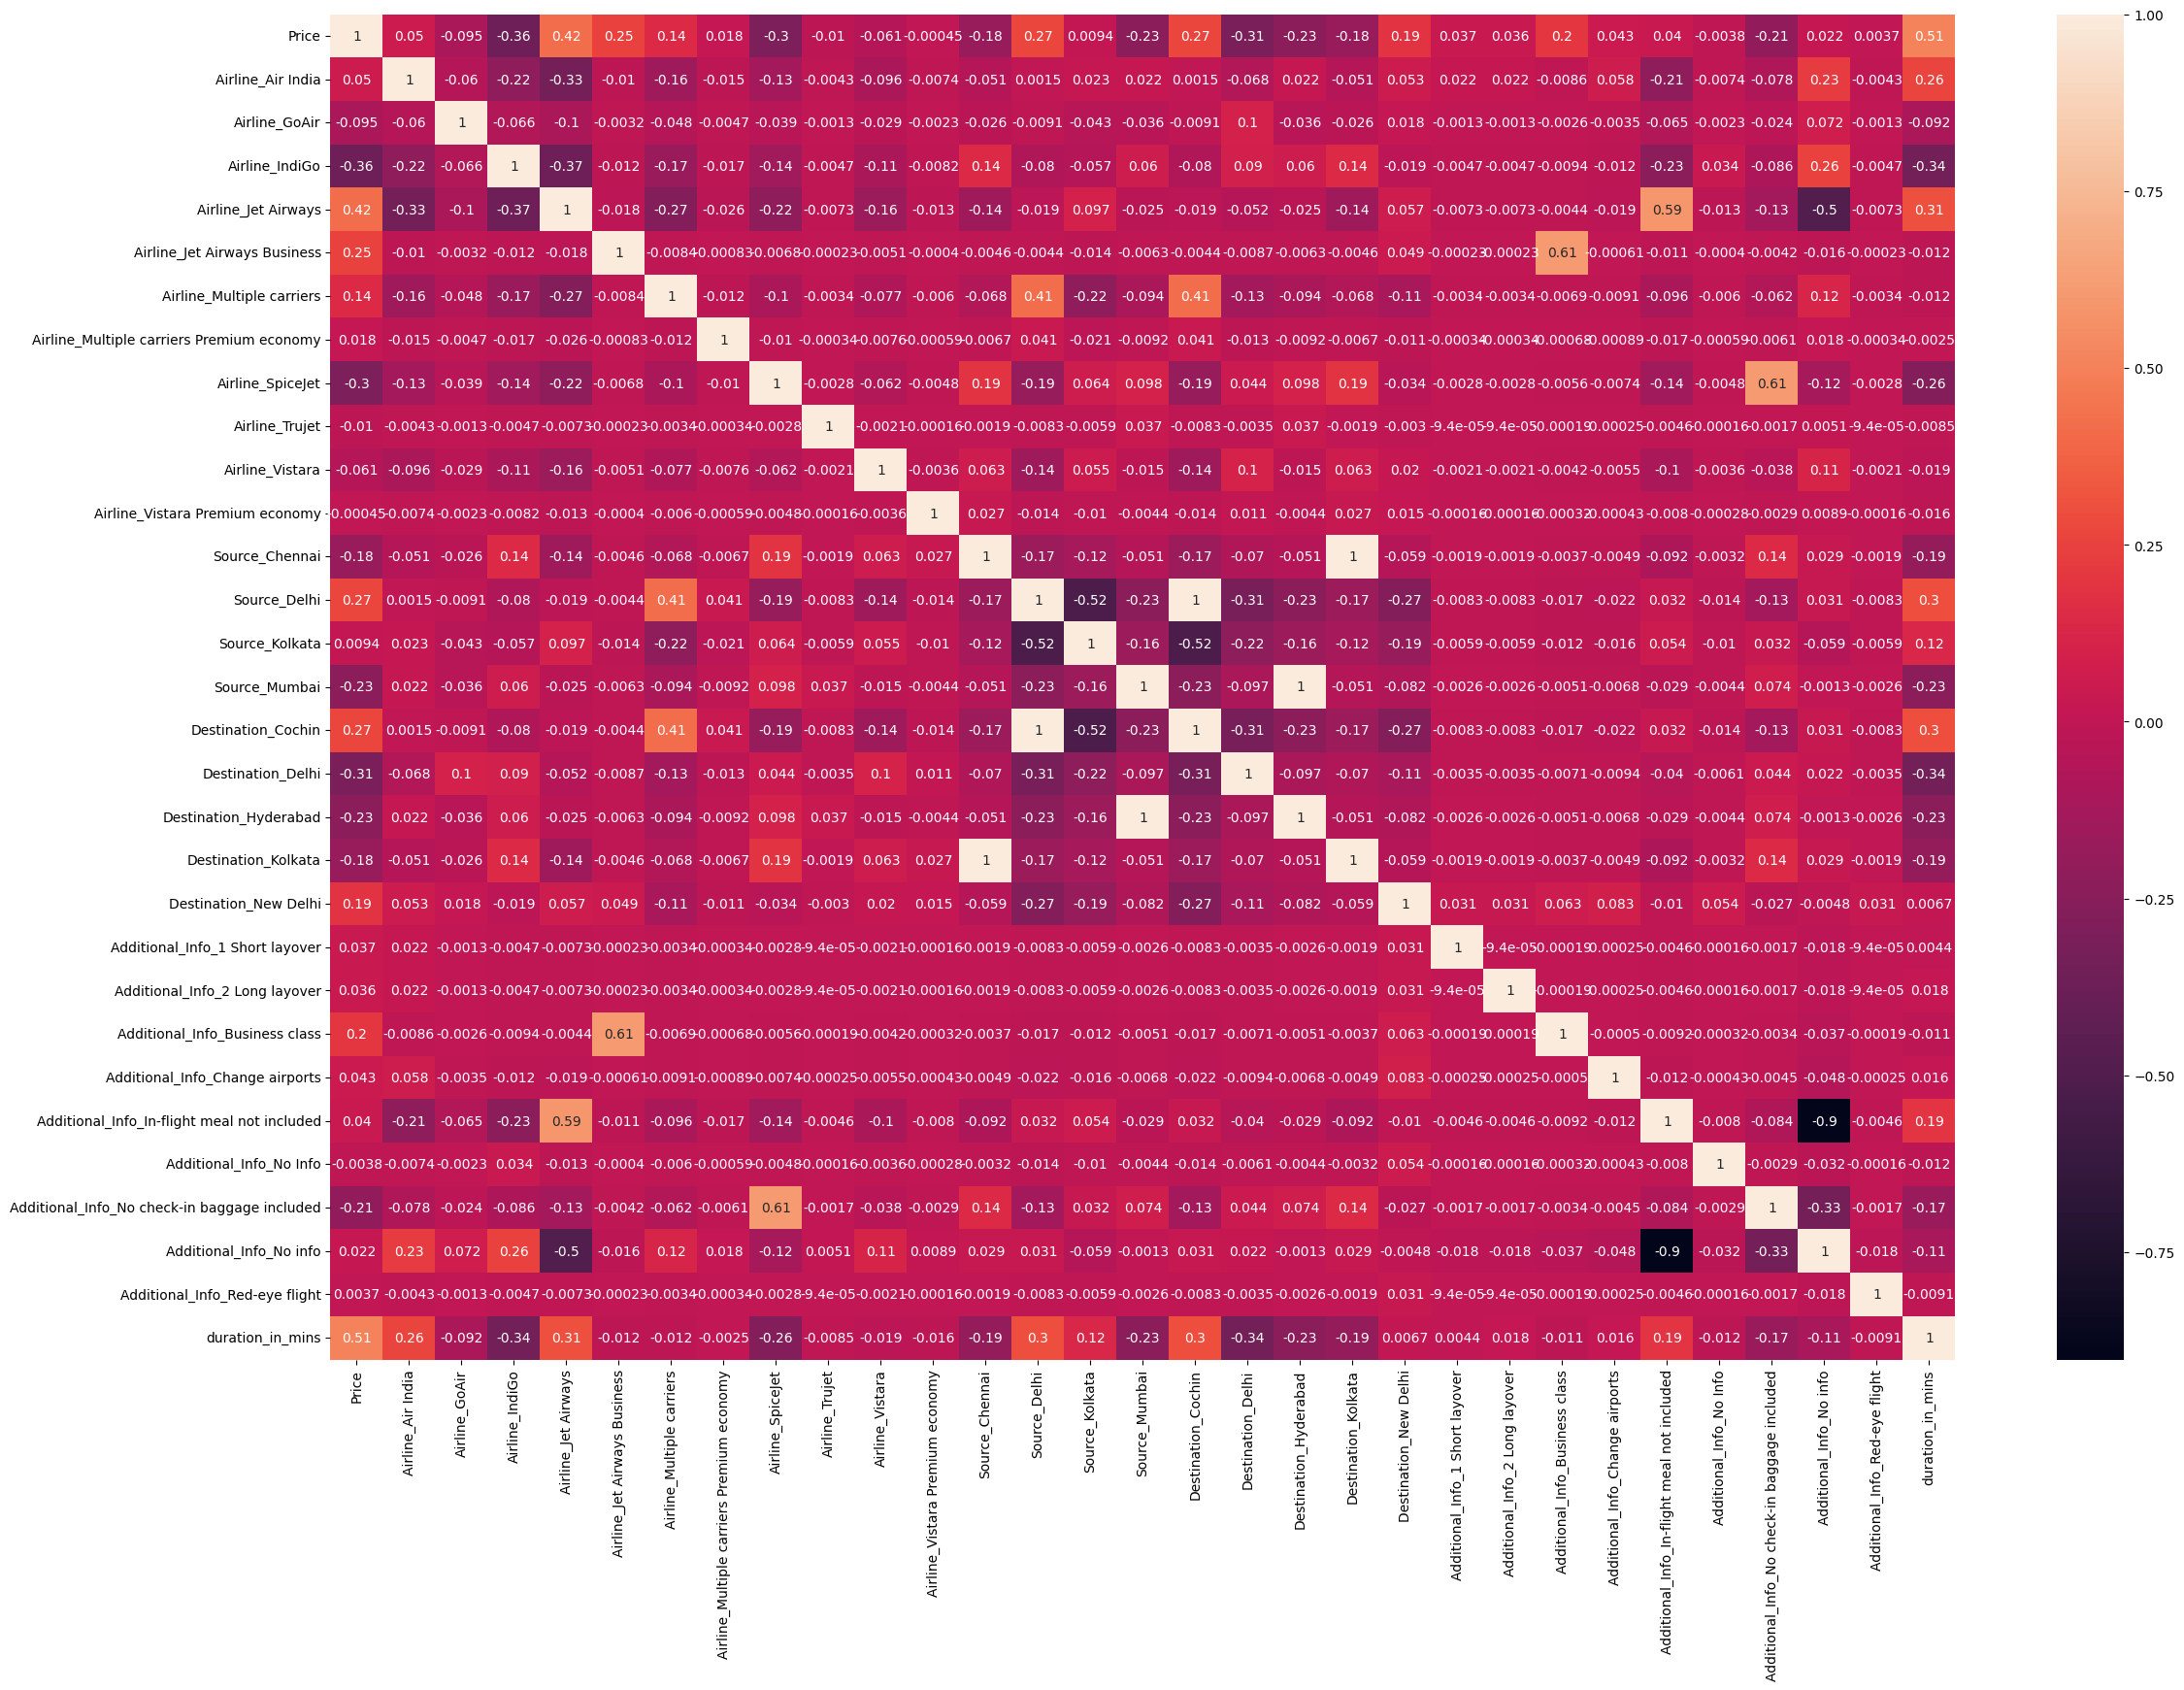

In [19]:
fig,ax = plt.subplots(figsize=(27,18))
sns.heatmap(df.corr(),annot=True)

In [20]:
# Let's create an object of StandardScaler class for doing feature scaling
scaler = StandardScaler()
y = df['Price']
X = df.drop(['Price'],axis=1)

In [21]:
# Doing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [22]:
# Let's normalize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
# Let's create an object of MultipleLR class
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression()

In [26]:
 #Making predictions
y_pred = lr.predict(X_test)

In [29]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 1919.304396227459
MSE 7562286.996145752
R2 score 0.6370795782754113
